In [94]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [95]:
df=pd.read_csv("students_adaptability_level_online_education.csv")
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [96]:
df.shape

(1205, 14)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [98]:
df["Class Duration"].value_counts()

1-3    840
3-6    211
0      154
Name: Class Duration, dtype: int64

In [99]:
df["Age"].value_counts()

21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64

In [100]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [101]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

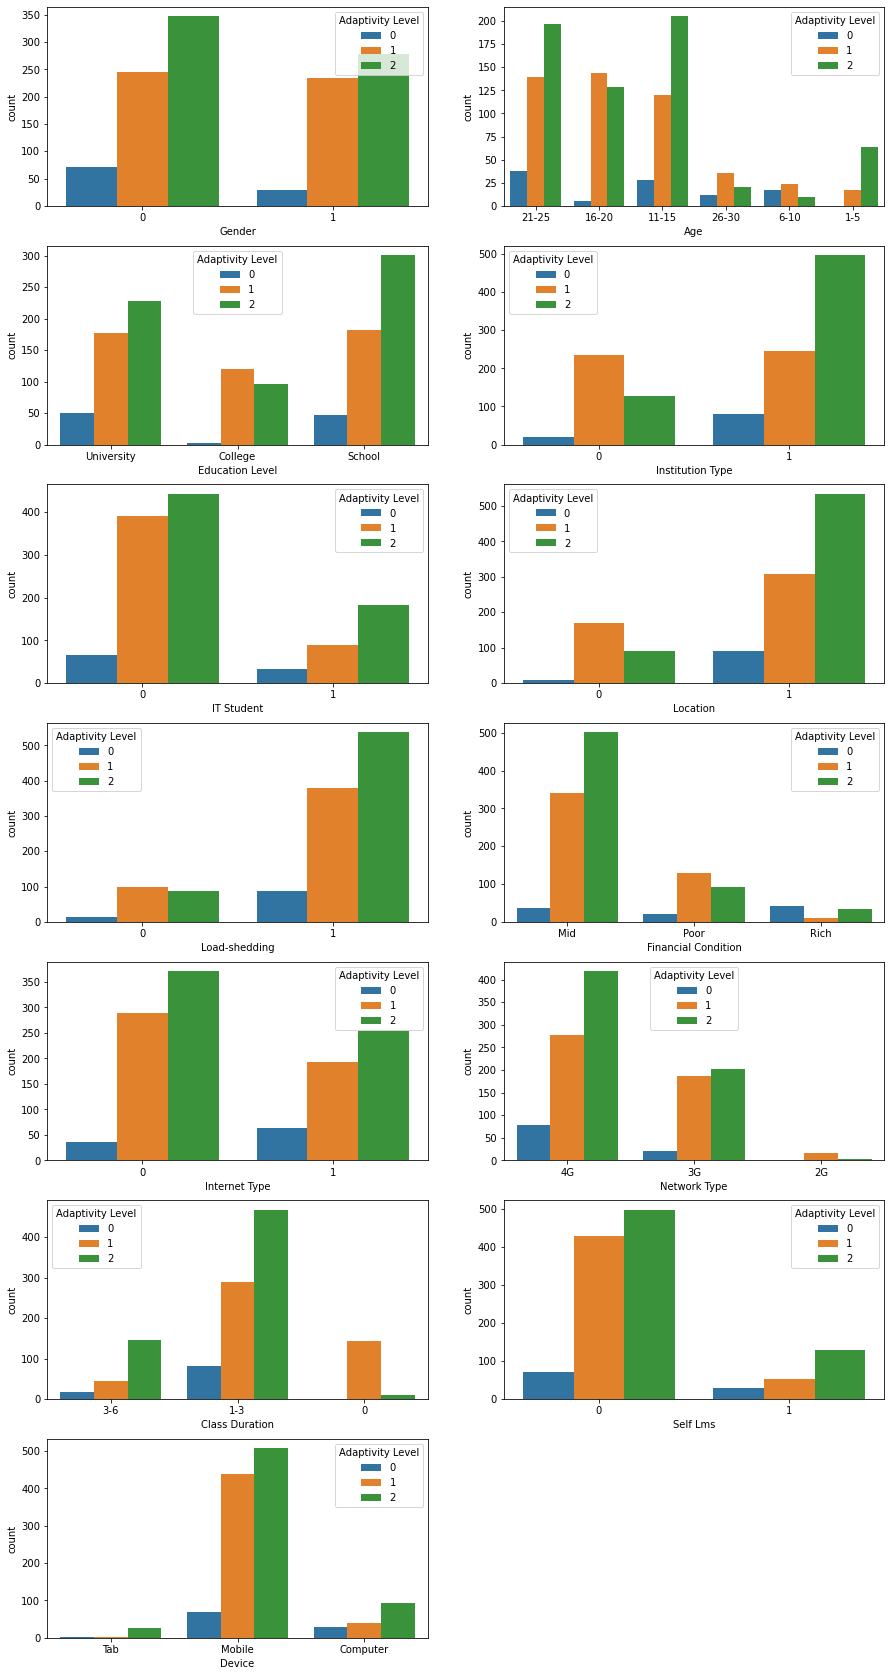

In [126]:
features=['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device']
       
plt.figure(figsize=(15,30))
for x,y in enumerate(features):
    plt.subplot(7,2,x+1)
    sns.countplot(df[y],hue=df["Adaptivity Level"])

plt.show()



   

In [103]:
features1=['Gender','Institution Type','IT Student','Location', 'Load-shedding','Internet Type','Self Lms','Adaptivity Level']

In [104]:
from sklearn.preprocessing import LabelEncoder
lebel1=LabelEncoder()

In [105]:
for items in features1:
    df[items]=lebel1.fit_transform(df[items])

In [106]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,21-25,University,1,0,1,1,Mid,1,4G,3-6,0,Tab,2
1,1,21-25,University,1,0,1,0,Mid,0,4G,1-3,1,Mobile,2
2,1,16-20,College,0,0,1,1,Mid,1,4G,1-3,0,Mobile,2
3,1,11-15,School,1,0,1,1,Mid,0,4G,1-3,0,Mobile,2
4,1,16-20,School,1,0,1,1,Poor,0,3G,0,0,Mobile,1


In [107]:
df.describe()

,Gender,Institution Type,IT Student,Location,Load-shedding,Internet Type,Self Lms,Adaptivity Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.449793,0.682988,0.252282,0.775934,0.833195,0.423237,0.174274,1.435685
std,0.497679,0.465506,0.434503,0.417139,0.372956,0.494277,0.379502,0.642013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [108]:
dummies=pd.get_dummies(df[['Education Level','Financial Condition','Age','Network Type','Class Duration','Device']])
df2=pd.concat([df,dummies],axis=1)

In [109]:
df2.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level', 'Education Level_College', 'Education Level_School',
       'Education Level_University', 'Financial Condition_Mid',
       'Financial Condition_Poor', 'Financial Condition_Rich', 'Age_1-5',
       'Age_11-15', 'Age_16-20', 'Age_21-25', 'Age_26-30', 'Age_6-10',
       'Network Type_2G', 'Network Type_3G', 'Network Type_4G',
       'Class Duration_0', 'Class Duration_1-3', 'Class Duration_3-6',
       'Device_Computer', 'Device_Mobile', 'Device_Tab'],
      dtype='object')

In [110]:
df2.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,...,Age_6-10,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Device_Computer,Device_Mobile,Device_Tab
0,0,21-25,University,1,0,1,1,Mid,1,4G,...,0,0,0,1,0,0,1,0,0,1
1,1,21-25,University,1,0,1,0,Mid,0,4G,...,0,0,0,1,0,1,0,0,1,0
2,1,16-20,College,0,0,1,1,Mid,1,4G,...,0,0,0,1,0,1,0,0,1,0
3,1,11-15,School,1,0,1,1,Mid,0,4G,...,0,0,0,1,0,1,0,0,1,0
4,1,16-20,School,1,0,1,1,Poor,0,3G,...,0,0,1,0,1,0,0,0,1,0


In [111]:
df3=df2.drop(['Education Level','Financial Condition','Age','Network Type','Class Duration','Device'],axis=1)

In [112]:
df3.shape

(1205, 29)

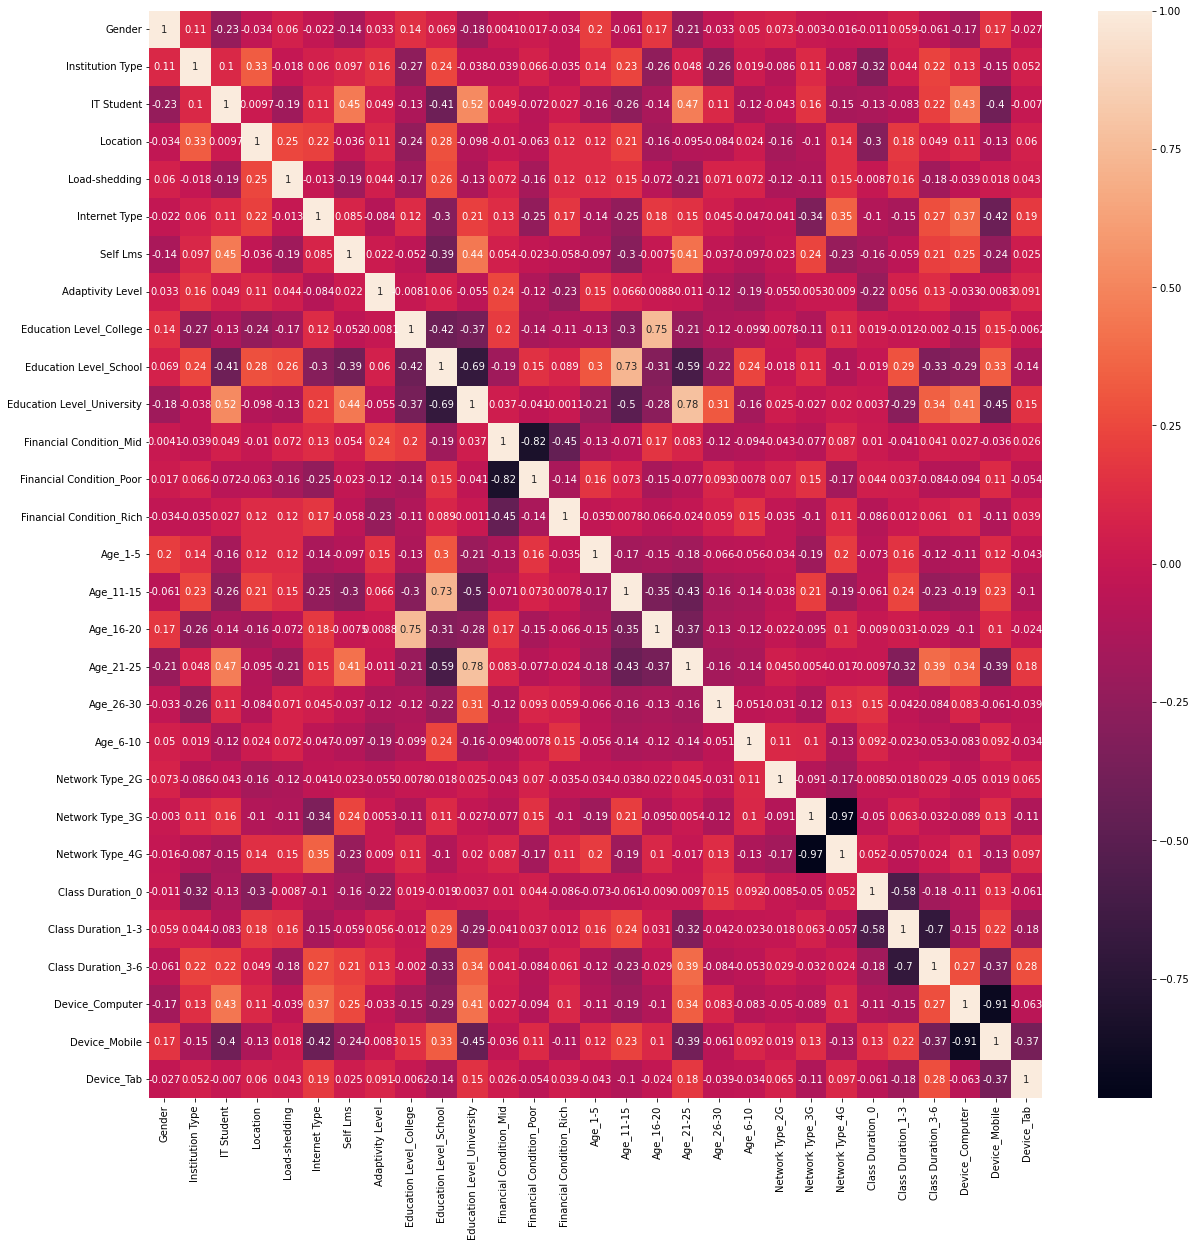

In [113]:
plt.figure(figsize=(20,20))
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [128]:
X=df3.drop(["Adaptivity Level"],axis=1)
y=df3['Adaptivity Level']

In [144]:
#splitting the train and test data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [145]:
#finding the Best Algorithm

models_param={
    'svm':{
        'model':SVC(gamma="auto"),
        'params':{
            'C':[1,10,20],
            "kernel":["rbf","linear"]
        }
    },
    'randomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },
    'LogesticRegression':{
        'model':LogisticRegression(),
        'params':{
            
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':["gini","entropy"]
        }
    },
    'ExtraTreesClassifier':{
        'model':ExtraTreesClassifier(),
        'params':{
            'criterion':["gini","entropy"]
        }
    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{
            
        }
    },
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params':{
            
        }
    }
    
}


In [146]:
# Finding best model and parms using GridSearchCV
scores=[]

for model_name,mp in models_param.items():
    gscv=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gscv.fit(x_train,y_train)
    scores.append({'model': model_name,
                  'best_Score':gscv.best_score_,
               'best_param':gscv.best_params_}
    )
df_params=pd.DataFrame(scores,columns=['model','best_Score','best_param'])
df_params

,model,best_Score,best_param
0,svm,0.792530,"{'C': 20, 'kernel': 'rbf'}"
1,randomForest,0.897301,{'n_estimators': 10}
2,LogesticRegression,0.700205,{}
3,DecisionTreeClassifier,0.902488,{'criterion': 'gini'}
4,ExtraTreesClassifier,0.901463,{'criterion': 'gini'}
5,GaussianNB,0.334979,{}
6,MultinomialNB,0.682529,{}


In [ ]:
df_params[["model",'best_Score']]